In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

plt.rcParams.update({'font.size': 32})

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI2 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI2")

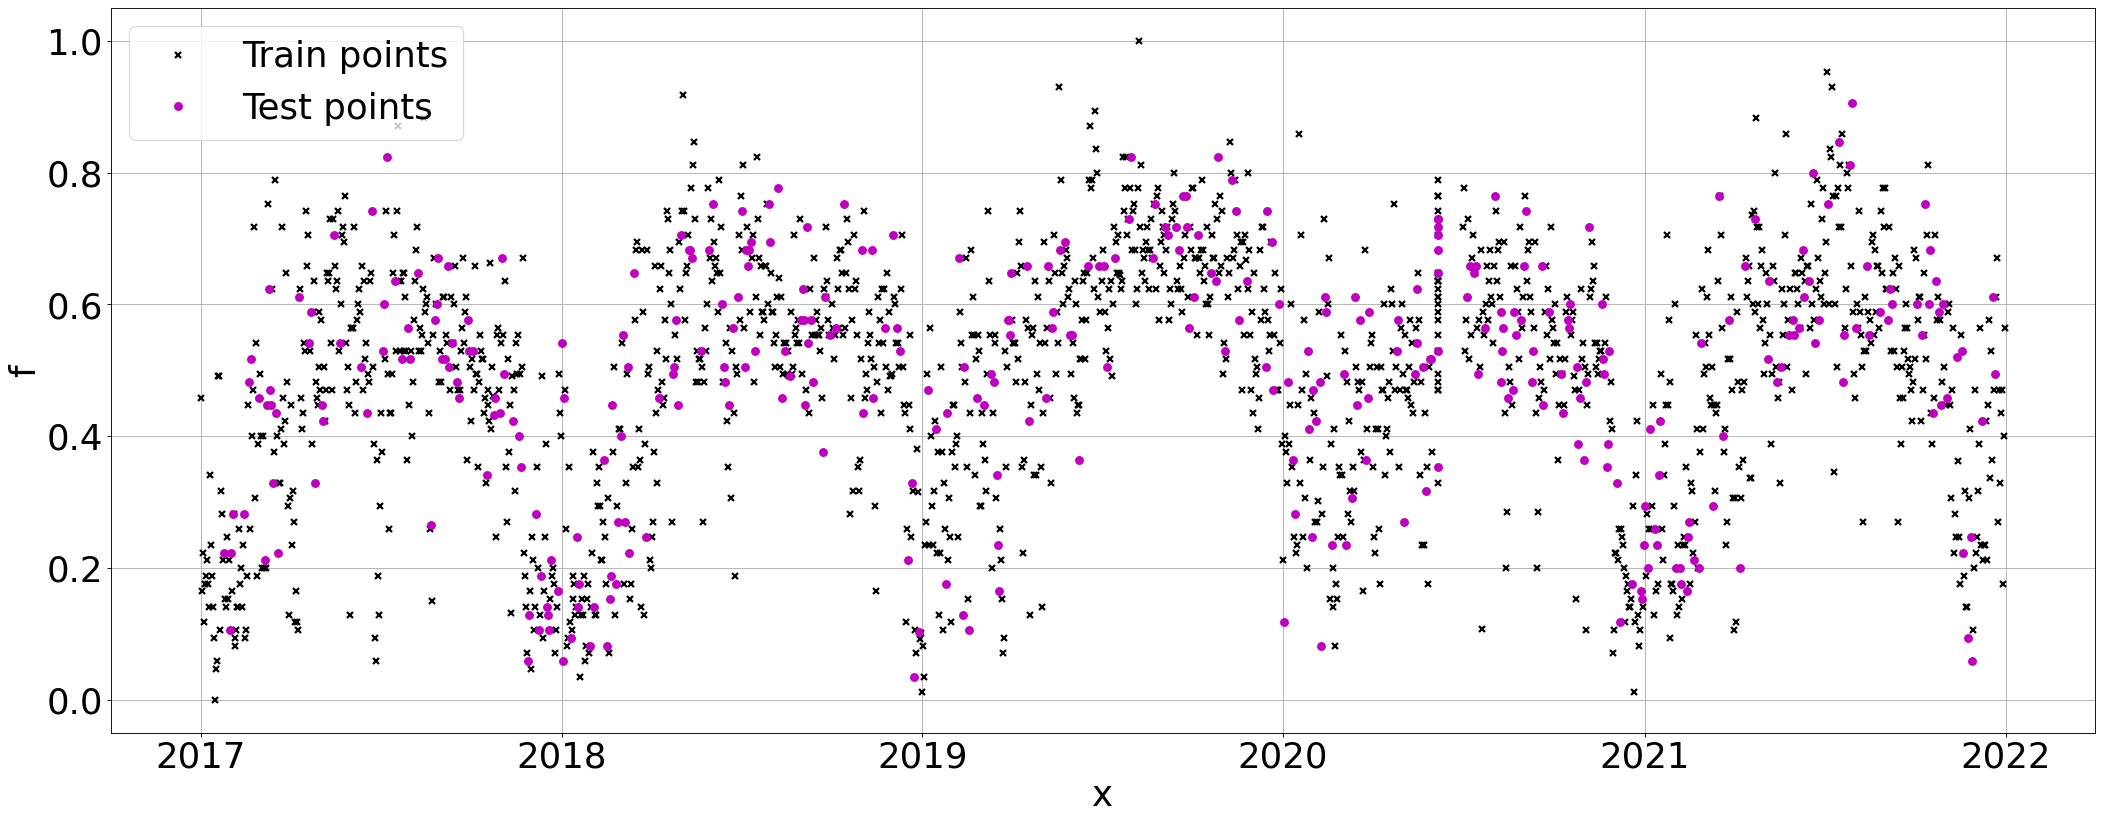

In [3]:
# X = np.array(DKI1.Tanggal.astype('int64') // 10**9)
X = np.array(DKI2.index).reshape(-1,1)
# X = np.array(DKI1['Tanggal']).reshape(-1,1)
Y = np.array(DKI2['PM10']).reshape(-1,1)

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI2['Tanggal'].loc[train_X.flatten()]).reshape(-1,1), train_Y, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI2['Tanggal'].loc[test_X.flatten()]).reshape(-1,1), test_Y, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

In [4]:
k = GPy.kern.Brownian(1)
m = GPy.models.GPRegression(train_X, train_Y, k)
m.optimize(messages=1, ipython_notebook=True)

In [5]:
m

GP_regression.,value,constraints,priors
Brownian.variance,0.001319690384741676,+ve,
Gaussian_noise.variance,0.012225766614154211,+ve,


In [6]:
# Denormalisasi
max = 98.0
min = 13.0
test_Y_denorm = (test_Y.flatten() * (max - min) + min)
prediksi_denorm = (m.predict(test_X)[0].flatten() * (max - min) + min)

In [7]:
date = np.array(DKI2['Tanggal'].loc[test_X.flatten()])

In [9]:
d = {"Tanggal":date, "PM10":test_Y_denorm, "Prediksi":prediksi_denorm}
DKI2_Prediction = pd.DataFrame(d)
DKI2_Prediction = DKI2_Prediction.sort_values(by=['Tanggal'])
DKI2_Prediction

,Tanggal,PM10,Prediksi
111,2017-01-24,32.0,30.941512
32,2017-01-30,22.0,28.756697
208,2017-01-31,32.0,28.447076
235,2017-02-02,37.0,27.950614
248,2017-02-14,37.0,30.271934
...,...,...,...
174,2021-11-27,34.0,36.471784
8,2021-11-28,18.0,35.968056
90,2021-12-08,49.0,39.866288
7,2021-12-19,65.0,50.847477


In [10]:
# Penyimpanan Data Prediksi
DKI2_Prediction.to_excel('./Data/Prediction/DKI2_01_PM10.xlsx', index=False)